<a href="https://colab.research.google.com/github/ReallyRally/Biomechanics-AI/blob/main/BMEAI_%EC%A0%9C7_2%ED%99%94_%5BTensorflow%5DDogs_vs_Cats_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 라이브러리(모듈) 입력

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import PIL
import zipfile
import random
import cv2


# 2. 구글 드라이브 지정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. 압축된 이미지불러오기

In [ ]:
zip = zipfile.ZipFile('/content/drive/MyDrive/Biomechanics/Biomechanics AI/dataset/dogs-vs-cats.zip', 'r')
zip.extractall('dogs-vs-cats')
zip.close()

In [ ]:
filelist = os.listdir('dogs-vs-cats')
len(filelist), type(filelist[0])

(25000, str)

# 4. 이미지 학습 데이터 전처리 및 분류 레이블링

### 데이터 레이블링 (Annotation)

In [ ]:
dogs = []
cats = []
size = 120

# 이미지를 하나씩 불러옵니다
for filename in filelist:
    #print(filename)
    split_str = filename.split('.')

    if split_str[0] == 'dog':
        #이미지 읽어오기
        img = cv2.imread(os.path.join('dogs-vs-cats', filename))

        #이미지 해상도 조정
        img_resized = cv2.resize(img,(size,size)) 

        # Dog의 label을 0으로 지정
        dogs.append([img_resized, 0]) 

    elif split_str[0] == 'cat':
         #이미지 읽어오기
        img = cv2.imread(os.path.join('dogs-vs-cats', filename))

        #이미지 해상도 조정
        img_resized = cv2.resize(img,(size,size)) 

        # Cat의 label을 1으로 지정
        cats.append([img_resized, 1]) 

len(dogs), len(cats)

(12500, 12500)

### 4-1. 데이터 수량 조절

In [ ]:
# For train data each one = 2000
# For Test dats each one = 500
data_size = 2000

dogs = dogs[:data_size]
cats = cats[:data_size]

len(dogs), len(cats)

(2000, 2000)

### 4-2. 이미지 확인

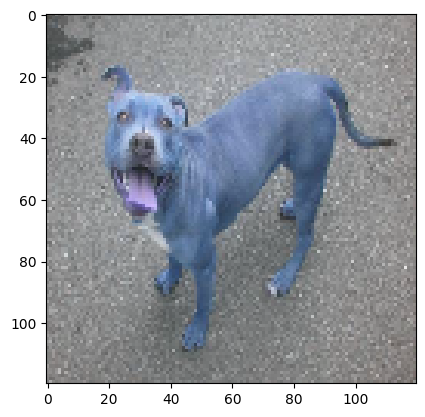

In [ ]:
plt.imshow(dogs[112][0])

### 4-4. 학습용 데이터 전처리

#### 데이터 그대로 사용

#### 데이터 랜덤하게 섞기

In [ ]:
datas =dogs + cats

random.seed(90)
random.shuffle(datas)

x=[]
y=[]
for value in datas:
    x.append(value[0])
    y.append(value[1])


len(x), len(y), #x2[155], y2[155]

(4000, 4000)

In [ ]:
train = np.array(x[:3000])
train_label = np.array(y[:3000])

validate = np.array(x[3000:3500])
validate_label = np.array(y[3000:3500])

test = np.array(x[3500:])
test_label = np.array(y[3500:])

train.shape, train_label.shape, test.shape, test_label.shape, validate.shape, validate_label.shape

((3000, 120, 120, 3),
 (3000,),
 (500, 120, 120, 3),
 (500,),
 (500, 120, 120, 3),
 (500,))

# 5. 딥러닝 모델 설계 및 학습 - Conv2D

In [ ]:
catDogClassifier  = tf.keras.models.Sequential([
    # 1차 Convolution layer
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape=(120,120,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # 2차 Convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # 3차 Convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # 4차 Convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # Dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')

])
catDogClassifier.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 15, 15, 64)      

In [ ]:
catDogClassifier.compile(optimizer = 'adam',
                         loss = 'sparse_categorical_crossentropy',
                         metrics = ['accuracy'])

In [ ]:
history = catDogClassifier.fit(train, train_label, epochs=20, validation_data=(validate, validate_label))

Epoch 1/20
94/94 [==============================] - 4s 20ms/step - loss: 1.7317 - accuracy: 0.5347 - val_loss: 0.6600 - val_accuracy: 0.5840
Epoch 2/20
94/94 [==============================] - 2s 18ms/step - loss: 0.6603 - accuracy: 0.5983 - val_loss: 0.6104 - val_accuracy: 0.6740
Epoch 3/20
94/94 [==============================] - 2s 18ms/step - loss: 0.6192 - accuracy: 0.6603 - val_loss: 0.6258 - val_accuracy: 0.6660
Epoch 4/20
94/94 [==============================] - 1s 16ms/step - loss: 0.5792 - accuracy: 0.6920 - val_loss: 0.6364 - val_accuracy: 0.6240
Epoch 5/20
94/94 [==============================] - 1s 15ms/step - loss: 0.5333 - accuracy: 0.7287 - val_loss: 0.6193 - val_accuracy: 0.6740
Epoch 6/20
94/94 [==============================] - 1s 16ms/step - loss: 0.5039 - accuracy: 0.7520 - val_loss: 0.6093 - val_accuracy: 0.6960
Epoch 7/20
94/94 [==============================] - 2s 16ms/step - loss: 0.4435 - accuracy: 0.7870 - val_loss: 0.6055 - val_accuracy: 0.7340
Epoch 8/20
94

# 7. 학습모델 평가

In [ ]:
img_test = test[251] #251 설명 미흡되는 이미지

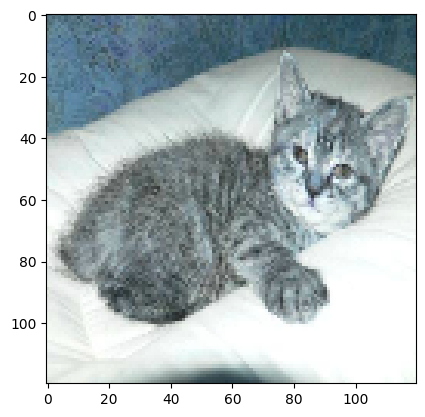

In [ ]:
plt.imshow(img_test)

In [ ]:
print("Test Accuracy",catDogClassifier.evaluate(test,test_label))
print('\n')
results = catDogClassifier.predict(img_test.reshape(1,120,120,3)) #[ 0, 1]
print(f"Prediction Dog : [{results[0][0]}]\nPrediction Cat : [{results[0][1]}]")

16/16 [==============================] - 0s 7ms/step - loss: 1.1034 - accuracy: 0.7040
Test Accuracy [1.1034388542175293, 0.7039999961853027]


1/1 [==============================] - 0s 93ms/step
Prediction Dog : [0.4227467477321625]
Prediction Cat : [0.5772532820701599]


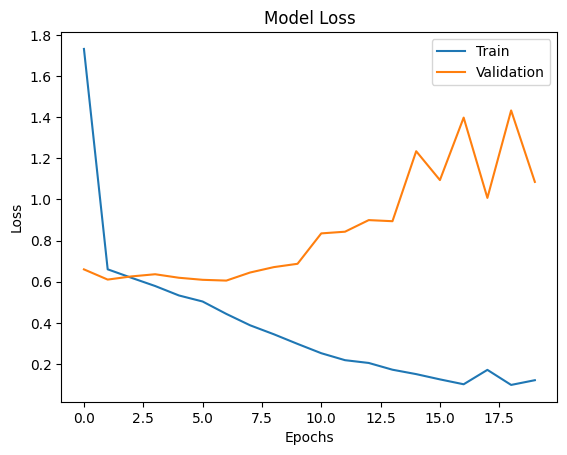

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()